In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import spacy
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
pd.options.display.max_colwidth=1000

In [2]:
import os
for dirname, _, filenames in os.walk("/Users/dhanarahulsainadiminti/Downloads/sent_ana_dataset/Narendra Modi_data.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv("/Users/dhanarahulsainadiminti/Downloads/sent_ana_dataset/Narendra Modi_data.csv")
df.head()

,Date,User,Tweet,Time
0,2022:10:19,QuestionsBotYT,Is Narendra Modi a toaster?,23:57:08
1,2022:10:19,PaperDabba,"5G About To Bring Major Change, Will Revolutionise Education Sector: PM Narendra Modi\nhttps://t.co/4ceDZIEpkX",23:56:38
2,2022:10:19,mnjworldcom123,"Prime Minister Shri Narendra Modi along with H.E. Mr. Pravind Kumar Jugnauth, Prime Minister of Mauritius &amp; Dr. Tedros Adhanom Ghebreyesus, Director General of WHO addressed the inaugural day of the Global Ayush Investment &amp; Innovation Summit at… https://t.co/vQ5Ks4k3hY",23:51:02
3,2022:10:19,BravePedestrian,"Bharat Mata has waited 5000 years for a true son like Narendra Modi to take birth. Modi is not just a PM, he is an incarnation of Lord Vishnu. Amit Shah is like Balarama. Ambani &amp; Adani are like Kubera &amp; Hanuman. Nirmala Sitaraman &amp; Smriti Irani are like Riddhi &amp; Siddhi",23:40:58
4,2022:10:19,NaMoPraveenKor,How Narendra Modi’s game-changing Gati Shakti master plan was envisaged\n https://t.co/v8nuhmrW1b\n\nvia NaMo App https://t.co/4vPzfj7amu,23:34:25


In [4]:
df.shape

(70000, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    70000 non-null  object
 1   User    70000 non-null  object
 2   Tweet   70000 non-null  object
 3   Time    70000 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [6]:
df.isnull().sum()

Date     0
User     0
Tweet    0
Time     0
dtype: int64

In [7]:
def remove_usernames_links(tweet):
    s2 = re.sub('http://\S+|https://\S+', '', tweet)
    s1=re.sub(r"#[a-zA-Z0-9\\n@_\s]+","",s2)
    return s1 

In [8]:
def remove_emoji(txt):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', txt)

In [9]:
custom_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [10]:
def TweetCleaning(tweet):
    link_removal=remove_usernames_links(tweet)
    emoji_removal=remove_emoji(link_removal)
    after_stopword_removal=' '.join(word for word in emoji_removal.split()if word not in custom_stopwords)
    return after_stopword_removal

In [11]:
def calcPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity


def calcSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return 'positive'
    elif tweet == 0 :
        return 'neutral'
    else:
        return 'negative'

In [12]:
df["CleanedTweet"]=df["Tweet"].apply(TweetCleaning)
df['tPolarity']=df['CleanedTweet'].apply(calcPolarity)
df['tSubjectivity']=df['CleanedTweet'].apply(calcSubjectivity)
df['segmentation']=df['tPolarity'].apply(segmentation)

In [13]:
df.head(10)

,Date,User,Tweet,Time,CleanedTweet,tPolarity,tSubjectivity,segmentation
0,2022:10:19,QuestionsBotYT,Is Narendra Modi a toaster?,23:57:08,Is Narendra Modi toaster?,0.0000,0.00,neutral
1,2022:10:19,PaperDabba,"5G About To Bring Major Change, Will Revolutionise Education Sector: PM Narendra Modi\nhttps://t.co/4ceDZIEpkX",23:56:38,"5G About To Bring Major Change, Will Revolutionise Education Sector: PM Narendra Modi",0.0625,0.50,positive
2,2022:10:19,mnjworldcom123,"Prime Minister Shri Narendra Modi along with H.E. Mr. Pravind Kumar Jugnauth, Prime Minister of Mauritius &amp; Dr. Tedros Adhanom Ghebreyesus, Director General of WHO addressed the inaugural day of the Global Ayush Investment &amp; Innovation Summit at… https://t.co/vQ5Ks4k3hY",23:51:02,"Prime Minister Shri Narendra Modi along H.E. Mr. Pravind Kumar Jugnauth, Prime Minister Mauritius &amp; Dr. Tedros Adhanom Ghebreyesus, Director General WHO addressed inaugural day Global Ayush Investment &amp; Innovation Summit at…",0.0250,0.25,positive
3,2022:10:19,BravePedestrian,"Bharat Mata has waited 5000 years for a true son like Narendra Modi to take birth. Modi is not just a PM, he is an incarnation of Lord Vishnu. Amit Shah is like Balarama. Ambani &amp; Adani are like Kubera &amp; Hanuman. Nirmala Sitaraman &amp; Smriti Irani are like Riddhi &amp; Siddhi",23:40:58,"Bharat Mata waited 5000 years true son like Narendra Modi take birth. Modi PM, incarnation Lord Vishnu. Amit Shah like Balarama. Ambani &amp; Adani like Kubera &amp; Hanuman. Nirmala Sitaraman &amp; Smriti Irani like Riddhi &amp; Siddhi",0.3500,0.65,positive
4,2022:10:19,NaMoPraveenKor,How Narendra Modi’s game-changing Gati Shakti master plan was envisaged\n https://t.co/v8nuhmrW1b\n\nvia NaMo App https://t.co/4vPzfj7amu,23:34:25,How Narendra Modi’s game-changing Gati Shakti master plan envisaged via NaMo App,0.0000,0.00,neutral
5,2022:10:19,xuenou,"5G About To Bring Major Change, Will Revolutionise Education Sector: PM Narendra Modi https://t.co/SOTkK2N9tH",23:32:05,"5G About To Bring Major Change, Will Revolutionise Education Sector: PM Narendra Modi",0.0625,0.50,positive
6,2022:10:19,aammiitt2,Narendra Modi is Elon Musk of Politics.\n\nEntreprenurial spirit and Full of Optimism.,23:25:20,Narendra Modi Elon Musk Politics. Entreprenurial spirit Full Optimism.,0.3500,0.55,positive
7,2022:10:19,ChadhaMadan,"@NamoApp Jai Hind , Jai Bhart, Bharat Mata ki Jai 🙏. Bande Mataram . Modi hai to Sabh Mumkin hai , I’m Proud of our India’s Prime Minister SHRI NARENDRA MODI THE GRATE MAN IN THE WORLD 🙏🙏",23:22:31,"@NamoApp Jai Hind , Jai Bhart, Bharat Mata ki Jai . Bande Mataram . Modi hai Sabh Mumkin hai , I’m Proud India’s Prime Minister SHRI NARENDRA MODI THE GRATE MAN IN THE WORLD",0.8000,1.00,positive
8,2022:10:19,mnjworldcom123,"Prime Minister Shri Narendra Modi holds bilateral discussions with H. E. Mr. Olaf Scholz, Federal Chancellor of Germany in Berlin https://t.co/kvXuEE5LG0",23:20:57,"Prime Minister Shri Narendra Modi holds bilateral discussions H. E. Mr. Olaf Scholz, Federal Chancellor Germany Berlin",0.0000,0.00,neutral
9,2022:10:19,mnjworldcom123,Prime Minister Shri Narendra Modi interacted with the Indian Community in Copenhagen https://t.co/S4AVajYOjZ,23:18:59,Prime Minister Shri Narendra Modi interacted Indian Community Copenhagen,0.0000,0.00,neutral


In [14]:
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,4102
neutral,39087
positive,26811


In [15]:
'''consolidated=' '.join(word for word in df ['CleanedTweet'])
wordCloud=WordCloud(width=400,height=200,random_state=20,max_font_size=119).generate(consolidated)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()'''

"consolidated=' '.join(word for word in df ['CleanedTweet'])\nwordCloud=WordCloud(width=400,height=200,random_state=20,max_font_size=119).generate(consolidated)\n\nplt.imshow(wordCloud,interpolation='bilinear')\nplt.axis('off')\nplt.show()"

<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

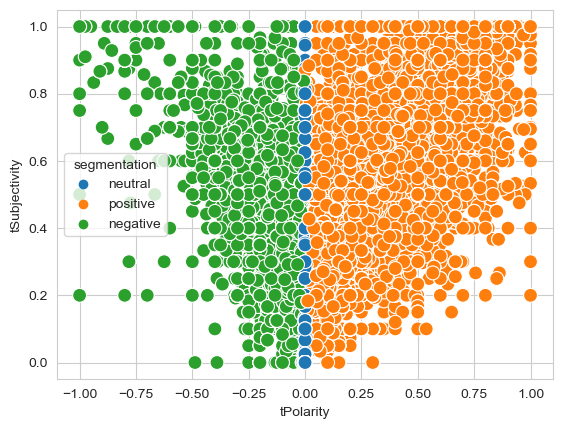

In [16]:
import seaborn as sns
sns.set_style('whitegrid')
sns.scatterplot(data=df,x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<Axes: xlabel='segmentation', ylabel='count'>

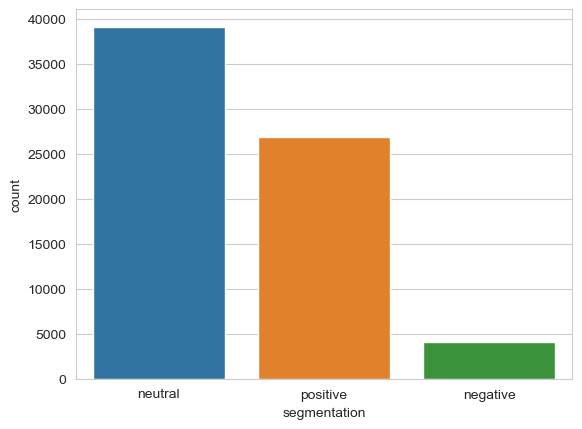

In [17]:
sns.countplot(data=df,x='segmentation')

In [18]:
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,4102
neutral,39087
positive,26811


In [19]:
def predict_sentiment(text):
    cleaned_text = TweetCleaning(text)
    polarity = calcPolarity(cleaned_text)
    
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# User input for text
user_text = input("Enter the text for sentiment prediction: ")

# Predict sentiment for user input
predicted_sentiment = predict_sentiment(user_text)
print(f"The predicted sentiment for the input text is: {predicted_sentiment}")

Enter the text for sentiment prediction: India is a great country
The predicted sentiment for the input text is: positive


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
data = df

# Split dataset into training and validation sets (80% train, 20% validation)
train_data, valid_data = train_test_split(data, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_data['CleanedTweet'])
X_valid = tfidf_vectorizer.transform(valid_data['CleanedTweet'])

# Define labels
y_train = train_data['segmentation']
y_valid = valid_data['segmentation']

# Train a Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Predict sentiments on the validation set
predictions = naive_bayes.predict(X_valid)

# Calculate accuracy
accuracy = accuracy_score(y_valid, predictions)
print(f"Validation Accuracy: {accuracy:.2f}%")

# Display classification report
print("Classification Report:")
print(classification_report(y_valid, predictions))


Validation Accuracy: 0.82%
Classification Report:
              precision    recall  f1-score   support

    negative       0.97      0.11      0.20       803
     neutral       0.92      0.81      0.86      7802
    positive       0.72      0.93      0.81      5395

    accuracy                           0.82     14000
   macro avg       0.87      0.62      0.62     14000
weighted avg       0.84      0.82      0.80     14000

